This notebook is used to create and test new wind forcing patterns in sbcana.F90.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

[Tuk data](http://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?searchType=stnName&timeframe=1&txtStationName=tuktoyaktuk&searchMethod=contains&optLimit=yearRange&StartYear=1840&EndYear=2017&Year=2017&Month=2&Day=28&selRowPerPage=25)

[climatology](http://www.tandfonline.com/doi/pdf/10.3137/ao.400205)

[eid](http://publications.gc.ca/collections/collection_2016/one-neb/NE22-4-114-eng.pdf)

[Revisiting the Definition of the Drag Coefficient in the Marine
Atmospheric Boundary Layer](http://www.atmo.arizona.edu/students/courselinks/fall10/atmo551a/DragCoef_2010jpo4420%252E1.pdf)

[large and pond 1984](http://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281981%29011%3C0324%3AOOMFMI%3E2.0.CO%3B2)


In [2]:
def plot_wind_stress(utau, vtau, rn_utau0, rn_vtau0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6)); fig.tight_layout()
    ax1.plot(utau, marker='o', c='k', lw=3)
    ax2.plot(vtau, marker='o', c='k', lw=3)
    ax1.axhline(rn_utau0, c = 'orangered', lw=3, label='rn_utau0 = -0.15 N/m2')
    ax2.axhline(rn_vtau0, c = 'forestgreen', lw=3, label='rn_vtau0 = 0.0 N/m2')
    ax1.set_title('wind stress along i-axis [N/m2] through time', fontsize=18)
    ax2.set_title('wind stress along j-axis [N/m2] through time', fontsize=18)
    ax1.set_ylim([-0.2, 0.1])
    print(utau[:5])
    return fig, ax1, ax2

# sbcana.F90

In [3]:
def sbcana(rn_utau0, rn_vtau0, nn_itend, nn_tau000, nn_write):
    zrhoa  = 1.2 # air density kg/m3
    zcdrag = 1.5e-3 # drag coefficient
    rpi = 3.141592653589793 # phycst
    rn_rdt = 10

    nn_tau000_write = nn_tau000/nn_write
    kt_all = np.arange(1, nn_itend+1)
    utau = np.ones_like(kt_all) * rn_utau0 
    vtau = np.ones_like(kt_all) * rn_vtau0

    for kt in range(1, nn_tau000+1):
        zfact = 0.5 * (1. - np.cos(rpi*kt.real/(nn_tau000.real/1.5)))
        ztx   = zfact * rn_utau0
        zty   = zfact * rn_vtau0
        utau[kt-1] = ztx
        vtau[kt-1] = zty  

    for kt in range(nn_tau000+1, nn_itend+1):
        utau[kt-1] = rn_utau0 * 0.1
    return utau, vtau, nn_tau000_write

[-0.00544967 -0.02061074 -0.04217828 -0.06545085 -0.08535534]


(-0.15, 0)

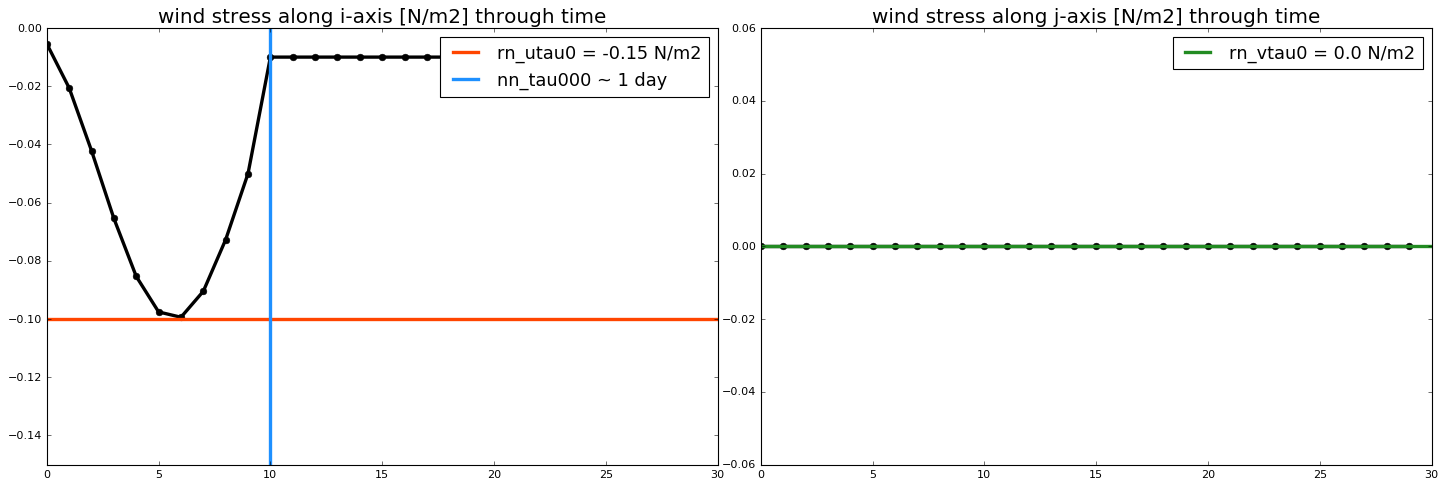

In [4]:
rn_utau0 = -0.1 # constant i-stress
rn_vtau0 = 0.0 # constant j-stress
nn_itend = 30 # number of time steps
nn_tau000 = 10 # spin up of the stress (time steps)
nn_write = 1 # frequency of write (time steps)
utau, vtau, nn_tau000_write = sbcana(rn_utau0, rn_vtau0, nn_itend, nn_tau000, nn_write)

#utau = np.round(utau[::nn_write],8)
#vtau = vtau[::nn_write]
fig, ax1, ax2 = plot_wind_stress(utau, vtau, rn_utau0, rn_vtau0)
ax1.axvline(nn_tau000_write, c = 'dodgerblue', lw=3, label='nn_tau000 ~ 1 day')
ax1.legend(fontsize=16); ax2.legend(fontsize=16)
ax1.set_ylim([-0.15, 0])

# Original Analytical Forcing (Run03)

[-0.00244717 -0.00954915 -0.02061074 -0.03454915 -0.05      ]


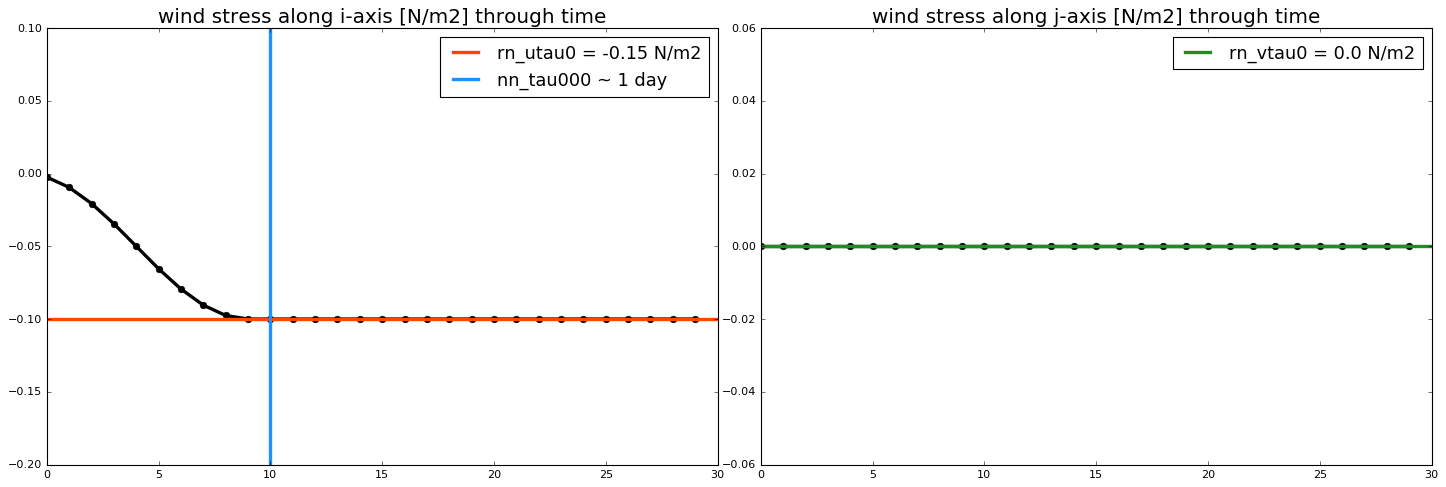

In [5]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'forcing01'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], rn_utau0, rn_vtau0)
ax1.axvline(nn_tau000_write, c = 'dodgerblue', lw=3, label='nn_tau000 ~ 1 day')
ax1.legend(fontsize=16); ax2.legend(fontsize=16)

# Version 2 (Reduced Nominal Value)

[-0.00244717 -0.00954915 -0.02061074 -0.03454915 -0.05      ]


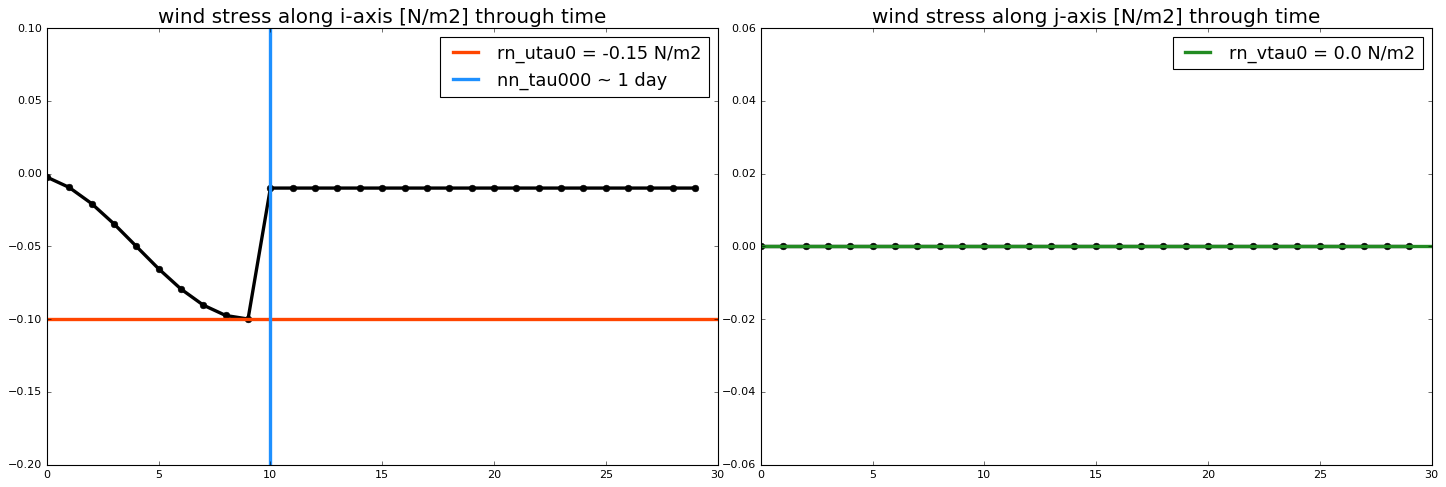

In [6]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'forcing02'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], rn_utau0, rn_vtau0)
ax1.axvline(nn_tau000_write, c = 'dodgerblue', lw=3, label='nn_tau000 ~ 1 day')
ax1.legend(fontsize=16); ax2.legend(fontsize=16)

# Version 3 (Smoother Transition)

[-0.00544967 -0.02061074 -0.04217828 -0.06545085 -0.08535534]


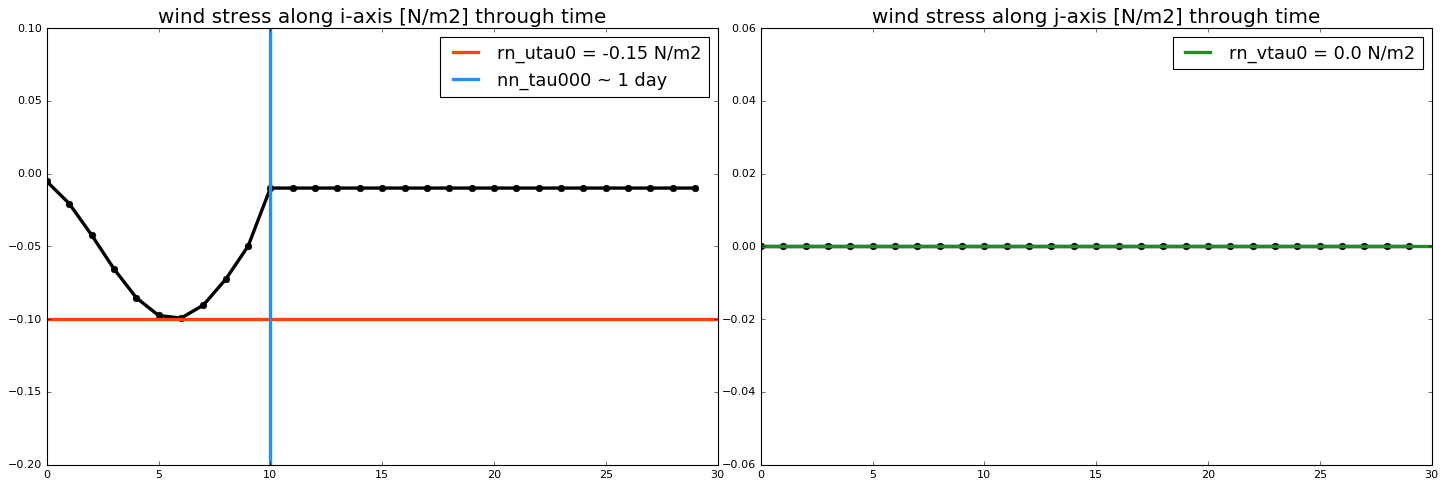

In [7]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'forcing03'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], rn_utau0, rn_vtau0)
ax1.axvline(nn_tau000_write, c = 'dodgerblue', lw=3, label='nn_tau000 ~ 1 day')
ax1.legend(fontsize=16); ax2.legend(fontsize=16)

# Pre-eventB (three stress stages)

[-0.00544967 -0.02061074 -0.04217828 -0.06545085 -0.08535534]


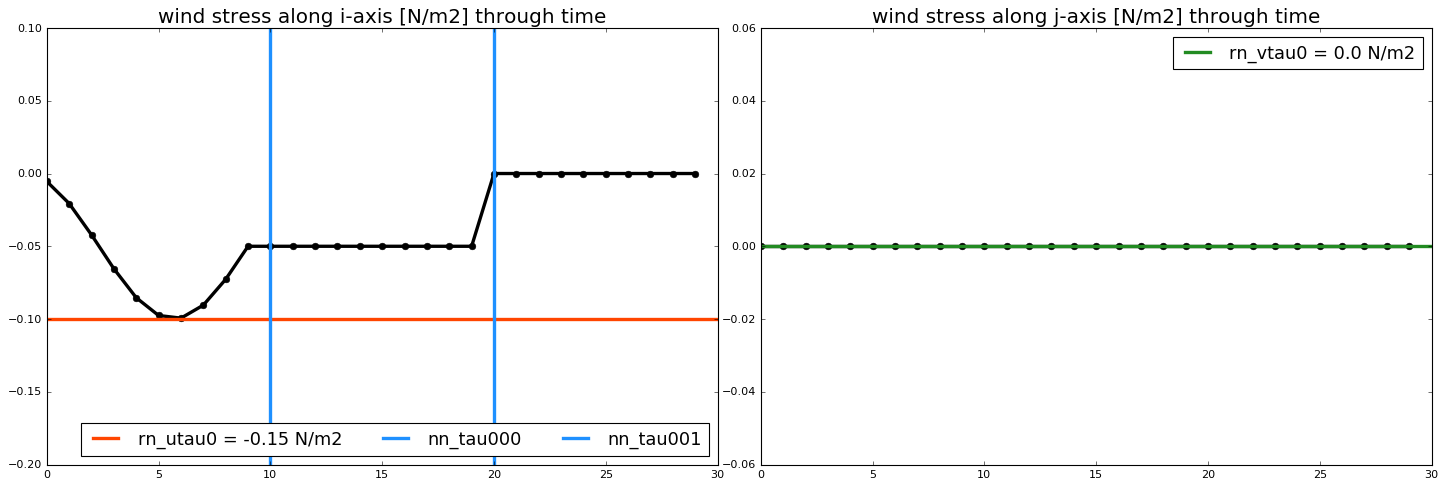

In [8]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'pre-eventB1'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], -0.1, 0)
ax1.axvline(10, c = 'dodgerblue', lw=3, label='nn_tau000')
ax1.axvline(20, c = 'dodgerblue', lw=3, label='nn_tau001')
ax1.legend(fontsize=16, loc=4, ncol=3); ax2.legend(fontsize=16)

[-0.00544967 -0.02061074 -0.04217828 -0.06545085 -0.08535534]


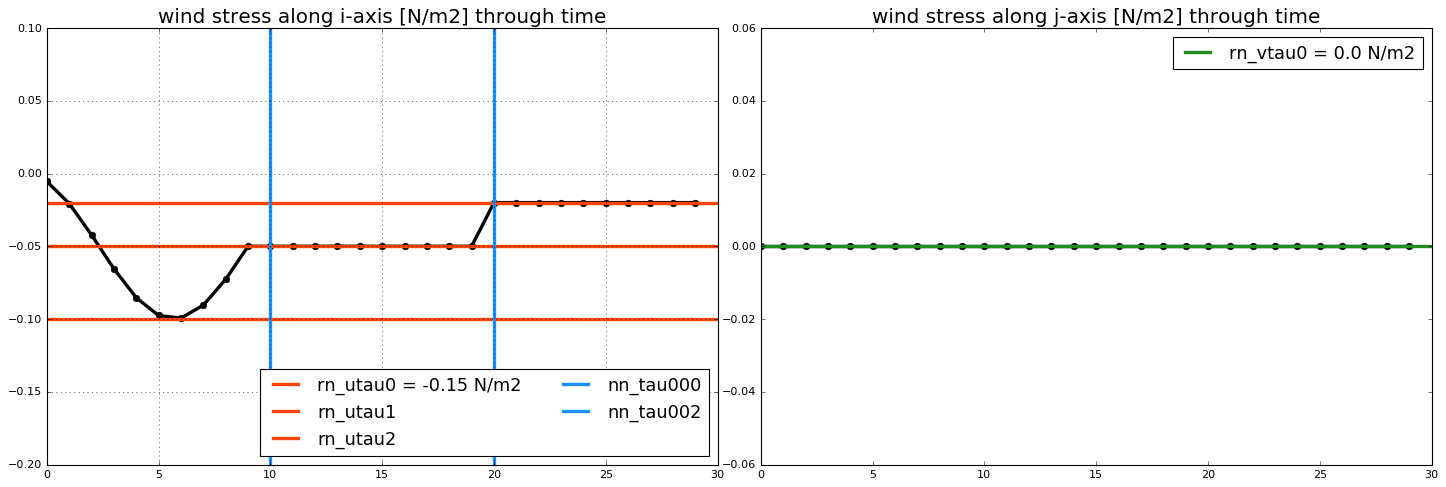

In [9]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'pre-eventB2'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], -0.1, 0)
ax1.axhline(-0.05, c = 'orangered', lw=3, label='rn_utau1')
ax1.axhline(-0.02, c = 'orangered', lw=3, label='rn_utau2')
ax1.axvline(10, c = 'dodgerblue', lw=3, label='nn_tau000')
ax1.axvline(20, c = 'dodgerblue', lw=3, label='nn_tau002')
ax1.legend(fontsize=16, loc=4, ncol=2); ax2.legend(fontsize=16); ax1.grid()

# smoothing edges

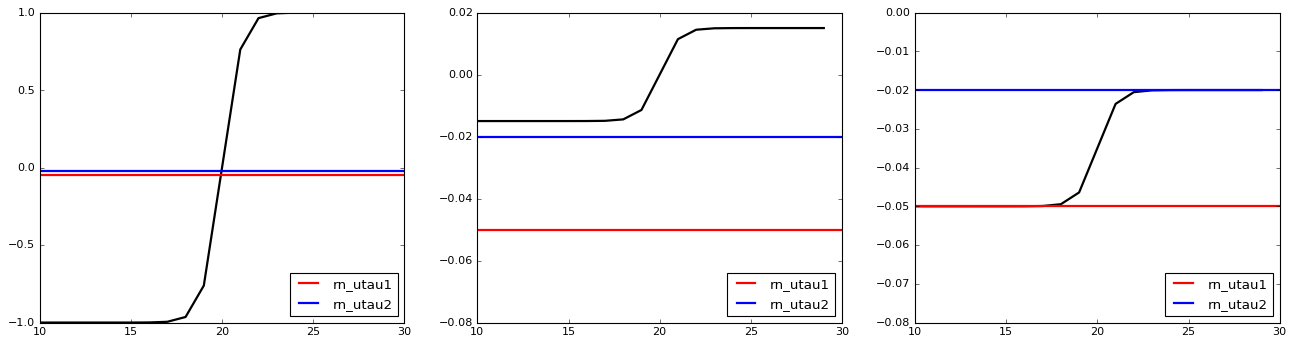

In [10]:
nn_tau000 = 10
nn_tau002 = 20

rn_utau1 = -0.05
rn_utau2 = -0.02

# tanh=0 at x=0 and tanh~1 at x~2
# So we want to move these time points to the sides of zero
time_seg = nn_tau002 - nn_tau000
kt = np.arange(nn_tau000, nn_tau002+time_seg)
xs_centered_at_zero = kt - nn_tau002

# I want tanh platforms to be at rn_utau1/2
# So, tanh has to be thick/thin enough to span the distance between rn_utau1/2
thickness_of_tanh = abs(rn_utau2 - rn_utau1)
amplitude_of_tanh = 0.5 * thickness_of_tanh

# the bottom platform is now at -1*amplitude_of_tanh
# so we need to know the distance between the goal (rn_utau1) and where it is (-1*amplitude_of_tanh)
distance_to_move = abs(rn_utau1 - (-1 * amplitude_of_tanh))

tanh1 = np.tanh(xs_centered_at_zero)
tanh2 = amplitude_of_tanh * np.tanh(xs_centered_at_zero)
tanh_final = (amplitude_of_tanh * np.tanh(xs_centered_at_zero)) - distance_to_move


# -----------------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.plot(kt, tanh1, c='k', lw=2)
ax2.plot(kt, tanh2, c='k', lw=2)
ax3.plot(kt, tanh_final, c='k', lw=2)
ax2.set_ylim([-0.08, 0.02])
ax3.set_ylim([-0.08, 0])
for ax in [ax1, ax2, ax3]:
    ax.axhline(rn_utau1, c='r', lw=2, label='rn_utau1')
    ax.axhline(rn_utau2, c='b', lw=2, label='rn_utau2')
    ax.legend(loc=4)

[-0.00817451 -0.03091611 -0.06326742 -0.09817628 -0.12803301]


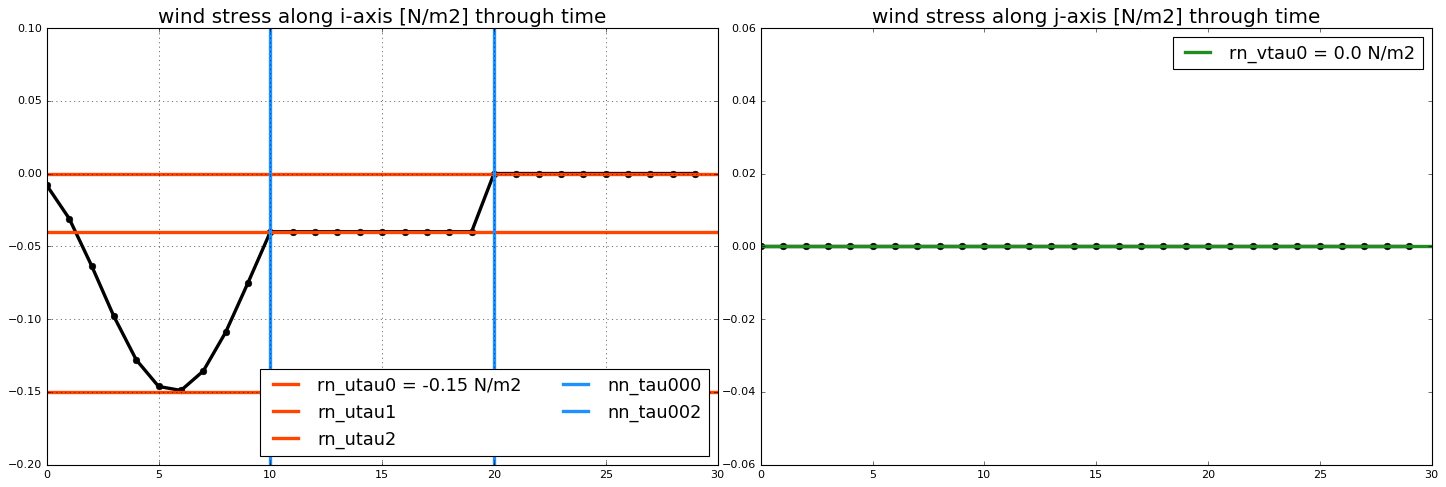

In [11]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'eventB'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], -0.15, 0)
ax1.axhline(-0.04, c = 'orangered', lw=3, label='rn_utau1')
ax1.axhline(0, c = 'orangered', lw=3, label='rn_utau2')
ax1.axvline(10, c = 'dodgerblue', lw=3, label='nn_tau000')
ax1.axvline(20, c = 'dodgerblue', lw=3, label='nn_tau002')
ax1.legend(fontsize=16, loc=4, ncol=2); ax2.legend(fontsize=16); ax1.grid()

         IF( kt > nn_tau000 ) THEN
            thickness_of_tanh = ABS(rn_utau2 - rn_utau1)
            amplitude_of_tanh = 0.5 * thickness_of_tanh
            distance_to_move = ABS(rn_utau1 - (-1 * amplitude_of_tanh))
            tanh_final = (amplitude_of_tanh * TANH( REAL( kt, wp ) - nn_tau002 ) ) - distance_to_move
            utau(:,:) = tanh_final
         ENDIF

[-0.00817451 -0.03091611 -0.06326742 -0.09817628 -0.12803301]


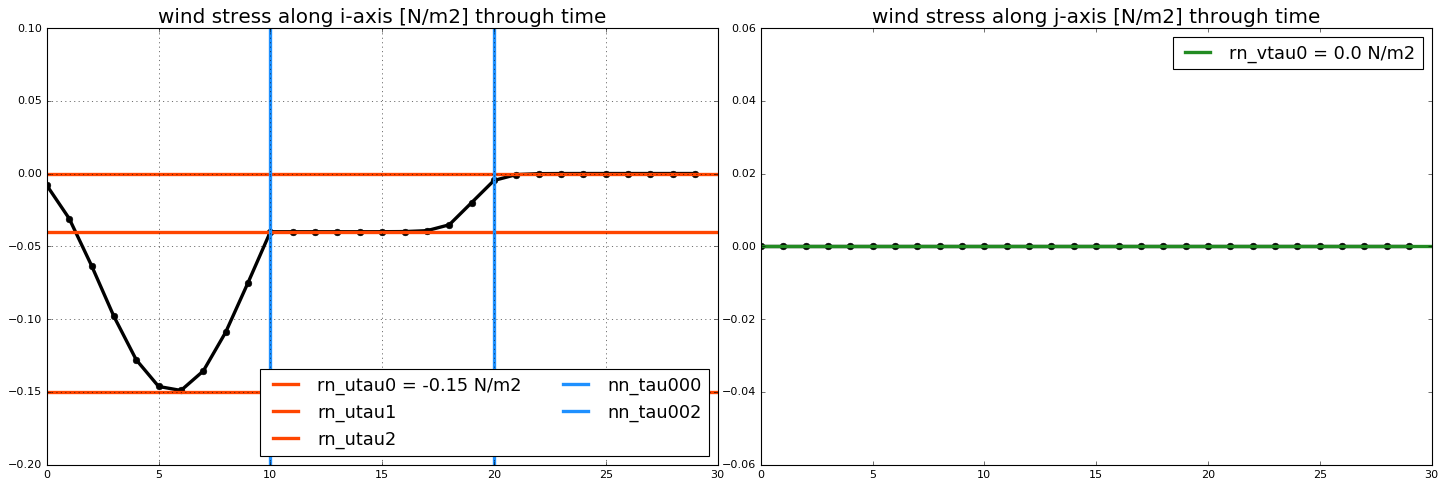

In [12]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'tanh'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], -0.15, 0)
ax1.axhline(-0.04, c = 'orangered', lw=3, label='rn_utau1')
ax1.axhline(0, c = 'orangered', lw=3, label='rn_utau2')
ax1.axvline(10, c = 'dodgerblue', lw=3, label='nn_tau000')
ax1.axvline(20, c = 'dodgerblue', lw=3, label='nn_tau002')
ax1.legend(fontsize=16, loc=4, ncol=2); ax2.legend(fontsize=16); ax1.grid()

# Shifting time parameters from time step to seconds

1. set nn_tau00x_step type
2. read namdom in addition to namsbc_ana
3. write values
4. introduce rn_rdt
5. calculate nn_tau00x_step
6. integrate nn_tau00x_step into calculations

[-0.00817451 -0.03091611 -0.06326742 -0.09817628 -0.12803301]


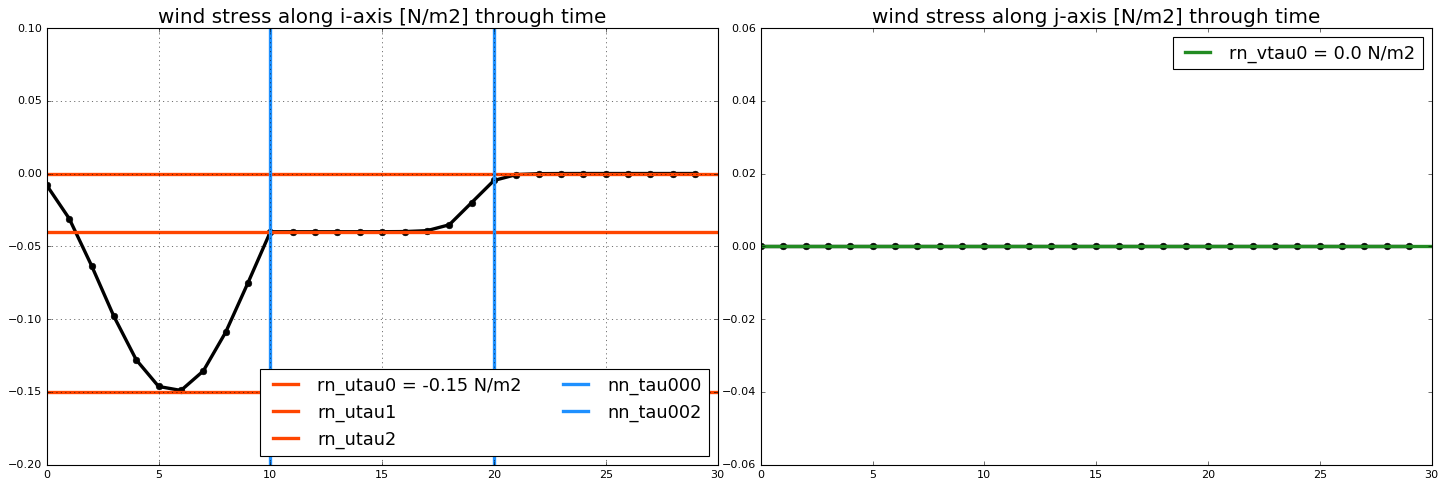

In [13]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/'
cfg = 'wind_timestep'
utau, vtau = functions_plot.load_model_other(path, cfg)
fig, ax1, ax2 = plot_wind_stress(utau[:, -1, -1], vtau[:, -1, -1], -0.15, 0)
ax1.axhline(-0.04, c = 'orangered', lw=3, label='rn_utau1')
ax1.axhline(0, c = 'orangered', lw=3, label='rn_utau2')
ax1.axvline(10, c = 'dodgerblue', lw=3, label='nn_tau000')
ax1.axvline(20, c = 'dodgerblue', lw=3, label='nn_tau002')
ax1.legend(fontsize=16, loc=4, ncol=2); ax2.legend(fontsize=16); ax1.grid()